![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

### Project Instructions

* Import, investigate and pre-process the "penguins.csv" dataset.
* Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [7]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [8]:
print(penguins_df.info())
print(penguins_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        332.000000       332.000000         332.000000   332.000000
mean          44.021084        17.153012         200.975904  4206.475904
std            5.452462         1.960275          14.035971   806.361278
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.700000        17.300000         197.000000  402

### Perform preprocessing steps on the dataset to create dummy variables

In [9]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# One-hot encoding the categorical features
penguins_dummies = pd.get_dummies(penguins_df, drop_first=True)

# Display the first few rows of the modified dataset
print(penguins_dummies.head())

# Standardizing the data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_dummies)

# Convert the scaled data back to a DataFrame
penguins_scaled_df = pd.DataFrame(penguins_scaled, columns=penguins_dummies.columns)

# Display the first few rows of the standardized data
print(penguins_scaled_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0              39.1             18.7              181.0       3750.0      True
1              39.5             17.4              186.0       3800.0     False
2              40.3             18.0              195.0       3250.0     False
3              36.7             19.3              193.0       3450.0     False
4              39.3             20.6              190.0       3650.0      True
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0         -0.903906         0.790360          -1.425342    -0.566948  0.993994
1         -0.830434         0.126187          -1.068577    -0.504847 -1.006042
2         -0.683490         0.432728          -0.426399    -1.187953 -1.006042
3         -1.344738         1.096901          -0.569105    -0.939551 -1.006042
4         -0.867170         1.761074          -0.783164    -0.691149  0.993994


### Detect the optimal number of clusters for k-means clustering
Perform Elbow analysis to determine the optimal number of clusters for this dataset.

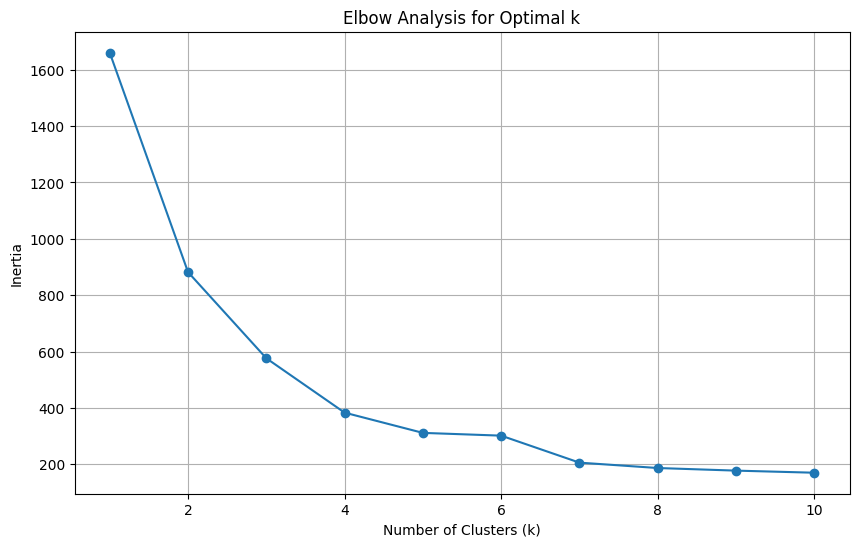

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize an empty list to store the inertia values
inertia = []

# Range of cluster numbers to try
k_range = range(1, 11)

# Perform k-means clustering for each k and calculate inertia
for k in k_range:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the standardized data
    kmeans.fit(penguins_scaled_df)
    
    # Append the inertia (sum of squared distances) to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia values for each k
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Analysis for Optimal k')
plt.grid(True)
plt.show()

### Run the k-means clustering algorithm
Using the optimal number of clusters obtained from the previous step, run the k-means clustering algorithm once more on the preprocessed data.

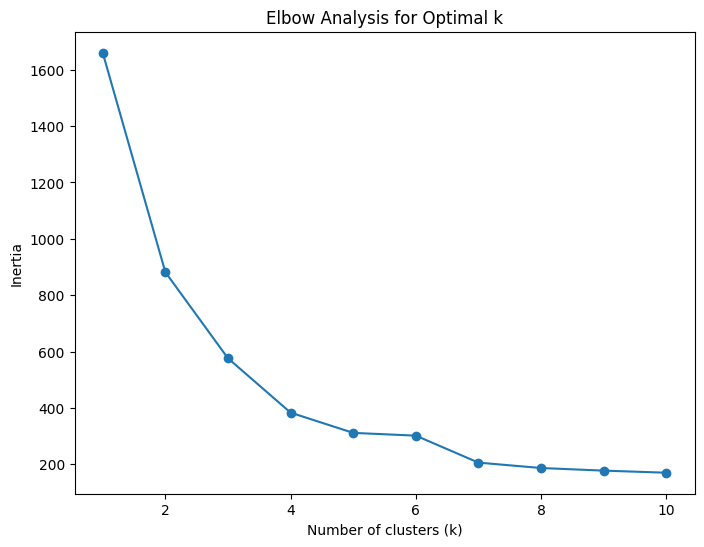

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.903906         0.790360          -1.425342    -0.566948   
1         -0.830434         0.126187          -1.068577    -0.504847   
2         -0.683490         0.432728          -0.426399    -1.187953   
3         -1.344738         1.096901          -0.569105    -0.939551   
4         -0.867170         1.761074          -0.783164    -0.691149   

   sex_MALE  Cluster  
0  0.993994        0  
1 -1.006042        2  
2 -1.006042        2  
3 -1.006042        2  
4  0.993994        0  


In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Elbow Analysis
inertias = []
k_range = range(1, 11)  # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_scaled_df)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Analysis
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Analysis for Optimal k')
plt.show()

# Step 2: Run k-means Clustering using the optimal number of clusters
# Based on Elbow analysis, let's assume the optimal k is 4
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(penguins_scaled_df)

# Add the cluster labels to the DataFrame
penguins_scaled_df['Cluster'] = kmeans_optimal.labels_

# Display the DataFrame with cluster labels
print(penguins_scaled_df.head())

### Create a final statistical DataFrame for each cluster.
Create a final characteristic DataFrame for each cluster using the groupby method and mean function only on numeric columns.

In [12]:
# Step 1: Inverse transform to get the original scale (exclude only the Cluster column)
penguins_original = scaler.inverse_transform(penguins_scaled_df.iloc[:, :-1])

# Convert to DataFrame with original column names
penguins_original_df = pd.DataFrame(penguins_original, columns=penguins_dummies.columns)

# Add the 'Cluster' column from the scaled DataFrame
penguins_original_df['Cluster'] = penguins_scaled_df['Cluster']

# Step 2: Calculate the mean for each cluster and create stat_penguins
stat_penguins = penguins_original_df.groupby('Cluster').mean()

# Display the final DataFrame
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
Cluster                                                                      
0               43.878302        19.111321         194.764151  4006.603774   
1               49.473770        15.718033         221.540984  5484.836066   
2               40.217757        17.611215         189.046729  3419.158879   
3               45.563793        14.237931         212.706897  4679.741379   

         sex_MALE  
Cluster            
0             1.0  
1             1.0  
2             0.0  
3             0.0  
